<a href="https://colab.research.google.com/github/prajna1803/ML_PROJECT/blob/main/lab_21164%20(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df=pd.read_excel("/content/dataset_final.xlsx")
df.head()

,serial_no,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,1,33.571474,37.613824,30.087053,37.102539,0.771983,0.746361,0.809737,0.747152,0.341245,...,5075.587782,0.036918,0.030155,0.037329,0.029864,0.192141,0.173651,0.193207,0.172812,0
1,2,18.461546,25.806718,25.655944,26.883562,0.797231,0.627642,0.614348,0.586758,0.081968,...,1678.201018,0.000190,0.000158,0.000198,0.000165,0.013800,0.012556,0.014080,0.012841,0
2,3,17.975612,24.888646,23.639344,23.941351,0.800654,0.667611,0.716540,0.705741,0.094696,...,1324.597589,0.000161,0.000127,0.000132,0.000130,0.012707,0.011277,0.011473,0.011389,0
3,4,11.001795,11.536333,9.729197,11.648599,0.869841,0.866218,0.894534,0.856053,0.638126,...,1055.424191,0.343982,0.346157,0.359534,0.345615,0.586500,0.588351,0.599612,0.587890,0
4,5,15.650286,17.982019,18.060362,17.958789,0.854187,0.811520,0.816796,0.805573,0.101942,...,758.388765,0.000241,0.000221,0.000243,0.000219,0.015534,0.014856,0.015576,0.014787,0


In [ ]:
df.shape

(7553, 26)

In [ ]:
np.dot(df["dissimilarity_0"],df["dissimilarity_45"])

2962566.8174803434

In [ ]:
np.linalg.norm(df["dissimilarity_0"])

1607.4502213786454

In [ ]:
df.head()

,serial_no,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,1,33.571474,37.613824,30.087053,37.102539,0.771983,0.746361,0.809737,0.747152,0.341245,...,5075.587782,0.036918,0.030155,0.037329,0.029864,0.192141,0.173651,0.193207,0.172812,0
1,2,18.461546,25.806718,25.655944,26.883562,0.797231,0.627642,0.614348,0.586758,0.081968,...,1678.201018,0.000190,0.000158,0.000198,0.000165,0.013800,0.012556,0.014080,0.012841,0
2,3,17.975612,24.888646,23.639344,23.941351,0.800654,0.667611,0.716540,0.705741,0.094696,...,1324.597589,0.000161,0.000127,0.000132,0.000130,0.012707,0.011277,0.011473,0.011389,0
3,4,11.001795,11.536333,9.729197,11.648599,0.869841,0.866218,0.894534,0.856053,0.638126,...,1055.424191,0.343982,0.346157,0.359534,0.345615,0.586500,0.588351,0.599612,0.587890,0
4,5,15.650286,17.982019,18.060362,17.958789,0.854187,0.811520,0.816796,0.805573,0.101942,...,758.388765,0.000241,0.000221,0.000243,0.000219,0.015534,0.014856,0.015576,0.014787,0


In [ ]:
grouped=df.groupby("label")
grouped.first()

,serial_no,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,...,contrast_90,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135
label,,,,,,,,,,,,,,,,,,,,,
0,1,33.571474,37.613824,30.087053,37.102539,0.771983,0.746361,0.809737,0.747152,0.341245,...,3810.050632,5075.587782,0.036918,0.030155,0.037329,0.029864,0.192141,0.173651,0.193207,0.172812
1,3829,16.543478,18.455937,16.094542,16.298331,0.866346,0.837143,0.873548,0.872575,0.115374,...,738.781692,747.112096,0.000234,0.000208,0.000237,0.000234,0.015286,0.014412,0.015409,0.015289


In [ ]:
class_A_data = df[df['label'] == 0]
class_B_data = df[df['label'] == 1]

In [ ]:
import numpy as np
centroid_A = np.mean(class_A_data, axis=0)
centroid_B = np.mean(class_B_data, axis=0)


In [ ]:
centroid_A

serial_no            1914.500000
dissimilarity_0        17.044693
dissimilarity_45       20.203107
dissimilarity_90       17.917098
dissimilarity_135      20.227566
correlation_0           0.864901
correlation_45          0.820686
correlation_90          0.848818
correlation_135         0.820730
homogeneity_0           0.191360
homogeneity_45          0.171782
homogeneity_90          0.199678
homogeneity_135         0.171545
contrast_0           1040.731278
contrast_45          1315.815731
contrast_90          1080.163765
contrast_135         1315.312656
ASM_0                   0.014668
ASM_45                  0.014084
ASM_90                  0.015501
ASM_135                 0.014086
energy_0                0.062978
energy_45               0.060136
energy_90               0.064959
energy_135              0.060122
label                   0.000000
dtype: float64

In [ ]:
centroid_B

serial_no            5691.000000
dissimilarity_0        17.541174
dissimilarity_45       19.985616
dissimilarity_90       17.593313
dissimilarity_135      19.955132
correlation_0           0.858542
correlation_45          0.827029
correlation_90          0.856335
correlation_135         0.827426
homogeneity_0           0.247043
homogeneity_45          0.224958
homogeneity_90          0.250354
homogeneity_135         0.224989
contrast_0           1276.215224
contrast_45          1528.766323
contrast_90          1260.922938
contrast_135         1526.161949
ASM_0                   0.027354
ASM_45                  0.026800
ASM_90                  0.028742
ASM_135                 0.026819
energy_0                0.096096
energy_45               0.093129
energy_90               0.097819
energy_135              0.093158
label                   1.000000
dtype: float64

In [ ]:
centroid_A = np.std(class_A_data,axis=0)
centroid_B = np.std(class_B_data,axis=0)

In [ ]:
x = np.linalg.norm(centroid_A - centroid_B)
x

423.42074097377736

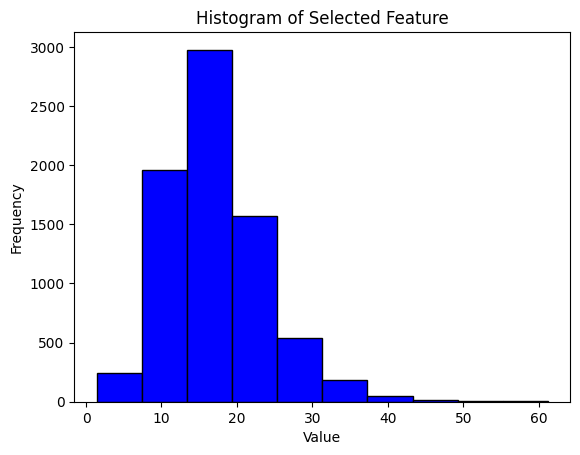

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

selected_feature = df['dissimilarity_0']
num_bins =10
hist, bins = np.histogram(selected_feature, bins=num_bins)

plt.hist(selected_feature, bins=num_bins,  color='b', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Selected Feature')
plt.show()

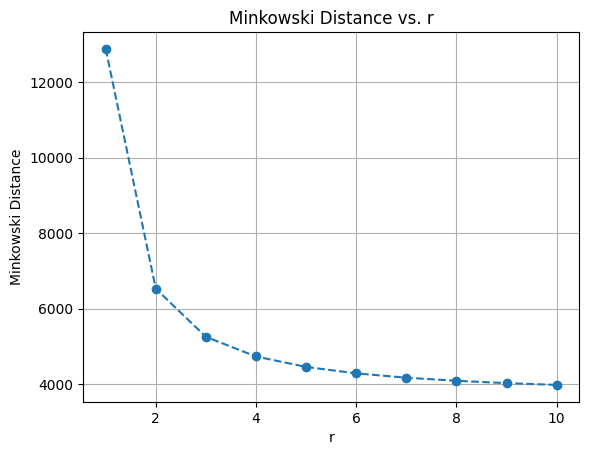

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
vector1 = df.iloc[0, :]
vector2 = df.iloc[1, :]
distances = []
r_values = list(range(1, 11))
for r in r_values:
    distance = np.power(np.sum(np.abs(vector1 - vector2) ** r), 1/r)
    distances.append(distance)

plt.plot(r_values, distances, marker='o', linestyle='--')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x = df.drop("label",axis=1)
y = df["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [ ]:
y_test

6495    1
229     0
5019    1
979     0
4826    1
       ..
3172    0
5051    1
59      0
4035    1
3379    0
Name: label, Length: 2266, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_preds=knn.predict(x_test)
y_preds

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

matrix=confusion_matrix(y_test,y_preds)
report = classification_report(y_test,y_preds)


In [ ]:
print(matrix)

[[958  16]
 [  5 910]]


In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       974
           1       0.98      0.99      0.99       915

    accuracy                           0.99      1889
   macro avg       0.99      0.99      0.99      1889
weighted avg       0.99      0.99      0.99      1889



In [ ]:
#loading dataset

data=pd.read_excel('ML_Lab4.xlsx')

data #printing data

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [ ]:
# Defining a function to calculate entropy for a given attribute
def calculate_entropy(attribute_values):
    entropy = 0
    total_instances = len(attribute_values)

    for category, count in attribute_values.value_counts().items():
        probability = count / total_instances
        entropy -= probability * math.log2(probability)

    return entropy

# Defining a function to calculate Information Gain
def calculate_information_gain(attribute_name, class_label):
    # Calculating the entropy of the entire dataset
    total_entropy = calculate_entropy(data[class_label])

    # Calculating the weighted average entropy after splitting on the attribute
    weighted_entropy = 0
    total_instances = len(data)

    for category, subset in data.groupby(attribute_name):
        probability = len(subset) / total_instances
        subset_entropy = calculate_entropy(subset[class_label])
        weighted_entropy += probability * subset_entropy

    # Calculating Information Gain
    information_gain = total_entropy - weighted_entropy

    return information_gain

best_attribute = None
lowest_entropy = float('inf')

for column in data.columns[:-1]:
    if data[column].dtype == 'object':
        entropy = calculate_entropy(data[column])
        print("Entropy of " + column + ": " + str(entropy))

        # Checking if this attribute has lower entropy than the current lowest entropy
        if entropy < lowest_entropy:
            lowest_entropy = entropy
            best_attribute = column

print("\nBest attribute for the first split: " + best_attribute)

best_attribute = None
highest_information_gain = -1

for column in data.columns[:-1]:
    if data[column].dtype == 'object':
        information_gain = calculate_information_gain(column, 'buys_computer')
        print("Information Gain of " + column + ": " + str(information_gain))

        # Checking if this attribute has higher Information Gain than the current highest
        if information_gain > highest_information_gain:
            highest_information_gain = information_gain
            best_attribute = column

print("\nBest attribute for the root node: " + best_attribute)


Entropy of age: 1.5774062828523454
Entropy of income: 1.5566567074628228
Entropy of student: 1.0
Entropy of credit_rating: 0.9852281360342515

Best attribute for the first split: credit_rating
Information Gain of age: 0.24674981977443933
Information Gain of income: 0.02922256565895487
Information Gain of student: 0.15183550136234159
Information Gain of credit_rating: 0.04812703040826949

Best attribute for the root node: age


In [ ]:
data = pd.DataFrame({'age_range': ['31...40', '41...50', '21...30', '31...40'],
                     'buys_computer': [1, 0, 0, 1]})

# Separate features (X) and target (y)
X = data.drop(columns=['buys_computer'])
y = data['buys_computer']

# Initializing the OrdinalEncoder to convert datatype
encoder = OrdinalEncoder()

# Transforming the 'age_range' column
X['age_range'] = encoder.fit_transform(X[['age_range']])

# Spliting the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Decision Tree model
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

training_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy:", training_accuracy)

tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)


Training Set Accuracy: 1.0
Tree Depth: 1


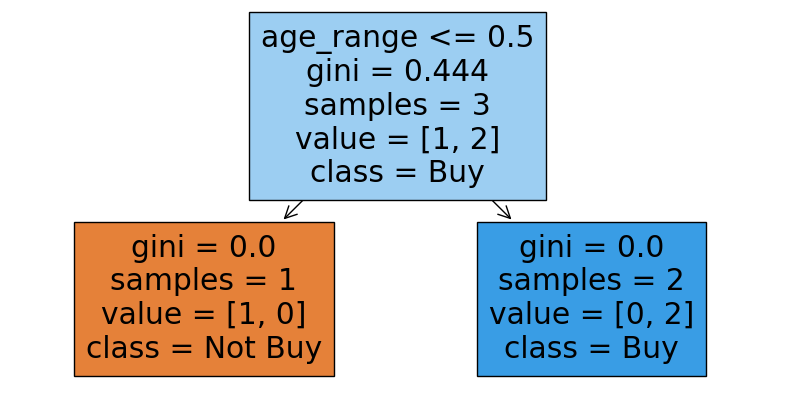

In [ ]:
# Setting the figure size for the plot
plt.figure(figsize=(10, 5))

# Decision Tree Plot
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Buy', 'Buy'])

plt.show()

In [ ]:
import pandas as pd
import numpy as np
df


,serial_no,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,1,33.571474,37.613824,30.087053,37.102539,0.771983,0.746361,0.809737,0.747152,0.341245,...,5075.587782,0.036918,0.030155,0.037329,0.029864,0.192141,0.173651,0.193207,0.172812,0
1,2,18.461546,25.806718,25.655944,26.883562,0.797231,0.627642,0.614348,0.586758,0.081968,...,1678.201018,0.000190,0.000158,0.000198,0.000165,0.013800,0.012556,0.014080,0.012841,0
2,3,17.975612,24.888646,23.639344,23.941351,0.800654,0.667611,0.716540,0.705741,0.094696,...,1324.597589,0.000161,0.000127,0.000132,0.000130,0.012707,0.011277,0.011473,0.011389,0
3,4,11.001795,11.536333,9.729197,11.648599,0.869841,0.866218,0.894534,0.856053,0.638126,...,1055.424191,0.343982,0.346157,0.359534,0.345615,0.586500,0.588351,0.599612,0.587890,0
4,5,15.650286,17.982019,18.060362,17.958789,0.854187,0.811520,0.816796,0.805573,0.101942,...,758.388765,0.000241,0.000221,0.000243,0.000219,0.015534,0.014856,0.015576,0.014787,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7548,7549,16.925538,20.332626,18.604267,19.585180,0.864210,0.829935,0.847647,0.824120,0.137506,...,1280.003693,0.000369,0.000351,0.000394,0.000340,0.019196,0.018735,0.019842,0.018445,1
7549,7550,17.848387,23.827080,24.299426,22.578884,0.775781,0.609099,0.578468,0.635227,0.106233,...,1304.169553,0.000796,0.000733,0.000885,0.000799,0.028216,0.027078,0.029746,0.028260,1
7550,7551,20.951268,24.088787,19.732787,23.811821,0.818473,0.777452,0.844136,0.784300,0.182817,...,1768.716003,0.000897,0.000643,0.001096,0.000663,0.029942,0.025353,0.033113,0.025749,1
7551,7552,14.827614,20.486181,19.381950,18.129424,0.849159,0.771357,0.797813,0.820712,0.211721,...,911.023256,0.003049,0.002118,0.002126,0.002239,0.055214,0.046026,0.046103,0.047319,1


Training Set Accuracy: 1.0
Test Set Accuracy: 1.0


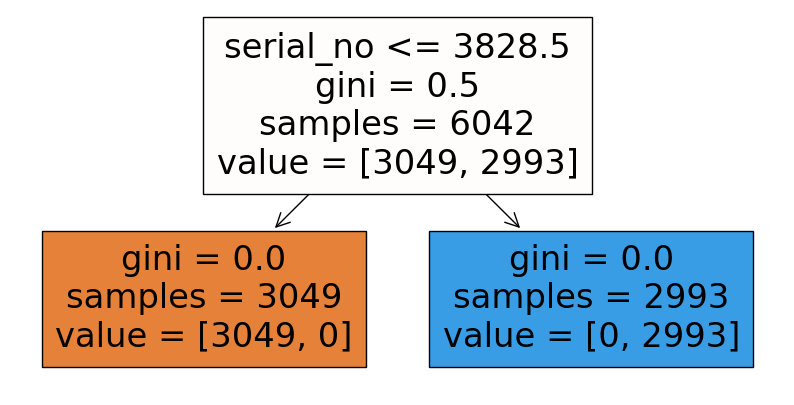

In [ ]:
# Separate features (X) and target (y)
from sklearn.model_selection import train_test_split
X = df.drop("label",axis=1)

y = df["label"]

# Splitting the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y  = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Decision Tree model
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Calculating the training set and test set accuracy
training_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy:", training_accuracy)

test_accuracy = model.score(Te_X, Te_y)
print("Test Set Accuracy:", test_accuracy)

# Decision Tree Plot
plt.figure(figsize=(10, 5))
plot_tree(model, filled=True, feature_names=X.columns)

plt.show()


Training Set Accuracy (max_depth=5): 100.00%
Test Set Accuracy (max_depth=5): 100.00%


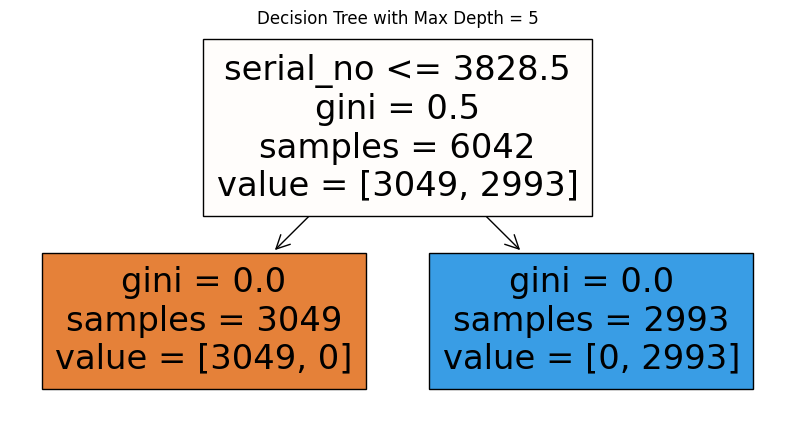

In [ ]:
# Separate features (X) and target (y)
X = df.drop("label",axis=1)
y = df["label"]

# Splitting the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Decision Tree model with max_depth constraint
max_depth = 5
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(Tr_X, Tr_y)

# Calculating the training set and test set accuracy
training_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy (max_depth={}): {:.2f}%".format(max_depth, training_accuracy * 100))

test_accuracy = model.score(Te_X, Te_y)
print("Test Set Accuracy (max_depth={}): {:.2f}%".format(max_depth, test_accuracy * 100))

# Decision Tree with max_depth constraint Plot
plt.figure(figsize=(10, 5))
plot_tree(model, filled=True, feature_names=X.columns)
plt.title("Decision Tree with Max Depth = {}".format(max_depth))
plt.show()

Training Set Accuracy (Entropy Criterion): 100.00%
Test Set Accuracy (Entropy Criterion): 100.00%


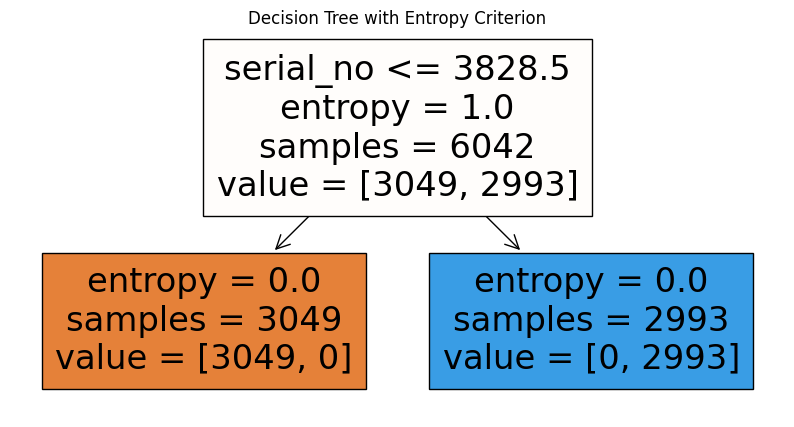

In [ ]:
# Fitting the Decision Tree model with "entropy" criterion
model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(Tr_X, Tr_y)

# Calculating the training set and test set accuracy for entropy criterion
training_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
print("Training Set Accuracy (Entropy Criterion): {:.2f}%".format(training_accuracy_entropy * 100))

test_accuracy_entropy = model_entropy.score(Te_X, Te_y)
print("Test Set Accuracy (Entropy Criterion): {:.2f}%".format(test_accuracy_entropy * 100))

# Decision Tree with entropy Plot
plt.figure(figsize=(10, 5))
plot_tree(model_entropy, filled=True, feature_names=X.columns)
plt.title("Decision Tree with Entropy Criterion")
plt.show()

In [ ]:
# Fitting a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(Tr_X, Tr_y)

# Making predictions on the test set using the Decision Tree classifier
decision_tree_predictions = decision_tree_classifier.predict(Te_X)

# Calculating accuracy and other performance metrics for the Decision Tree
decision_tree_accuracy = accuracy_score(Te_y, decision_tree_predictions)
decision_tree_report = classification_report(Te_y, decision_tree_predictions, output_dict=True)

print("Decision Tree Classifier Performance:")
print("Accuracy:", decision_tree_accuracy)
print("Classification Report:")
print("Precision:", decision_tree_report['1']['precision'])
print("Recall:", decision_tree_report['1']['recall'])
print("F1 Score:", decision_tree_report['1']['f1-score'])

# Fitting a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(Tr_X, Tr_y)

# Making predictions on the test set using the Random Forest classifier
random_forest_predictions = random_forest_classifier.predict(Te_X)

# Calculating accuracy and other performance metrics for the Random Forest
random_forest_accuracy = accuracy_score(Te_y, random_forest_predictions)
random_forest_report = classification_report(Te_y, random_forest_predictions, output_dict=True)

print("\nRandom Forest Classifier Performance:")
print("Accuracy:", random_forest_accuracy)
print("Classification Report:")
print("Precision:", random_forest_report['1']['precision'])
print("Recall:", random_forest_report['1']['recall'])
print("F1 Score:", random_forest_report['1']['f1-score'])


Decision Tree Classifier Performance:
Accuracy: 1.0
Classification Report:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Random Forest Classifier Performance:
Accuracy: 1.0
Classification Report:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


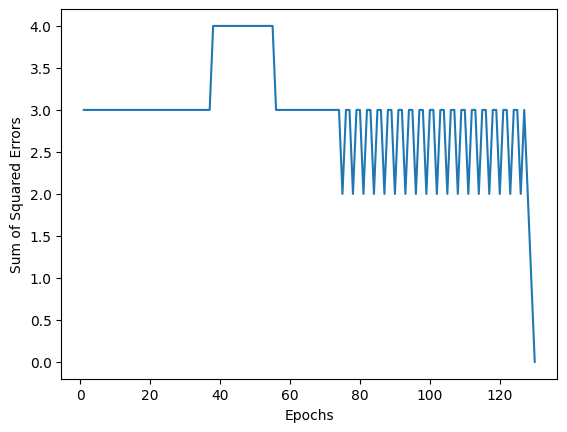

Final Weights: [-0.1   0.1   0.05]
Number of Epochs: 130


In [ ]:
"""A1. Develop the above perceptron in your own code (don’t use the perceptron model available from
package). Use the initial weights as provided below.
W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05
Use Step activation function to learn the weights of the network to implement above provided AND
gate logic. The activation function is demonstrated below.Identify the number of epochs needed for the weights to converge in the learning process. Make a
plot of the epochs against the error values calculated (after each epoch, calculate the sum-squareerror against all training samples)."""
W0 = 10

W1 = 0.2

W2 = -0.75

alpha = 0.05



# Define step activation function

def step(x):

    return 1 if x >= 0 else 0



# Define predict function

def predict(row, weights):

    activation = weights[0] + np.dot(row, weights[1:])

    return step(activation)



# Define train_weights function

def train_weights(train, alpha, epochs):

    weights = np.array([W0, W1, W2])

    errors = []

    for epoch in range(epochs):

        sum_error = 0

        for row in train:

            prediction = predict(row[:-1], weights)

            error = row[-1] - prediction

            sum_error += error**2

            weights[0] += alpha * error

            weights[1:] += alpha * error * row[:-1]

        errors.append(sum_error)

        if sum_error <= 0.002:

            break

    return weights, errors



# Define sum_squared_error function

def sum_squared_error(train, weights):
    error = 0
    for row in train:
        prediction = predict(row[:-1], weights)
        error += (row[-1] - prediction)**2
    return error
# Define training data
train = np.array([[0, 0, 0],

                  [0, 1, 0],

                  [1, 0, 0],

                  [1, 1, 1]])
# Train the perceptron and plot the epochs against the error values
weights, errors = train_weights(train, alpha, 1000)
plt.plot(range(1, len(errors)+1), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.show()
# Print the final weights and the number of epochs needed for convergence
print('Final Weights:', weights)
print('Number of Epochs:', len(errors))







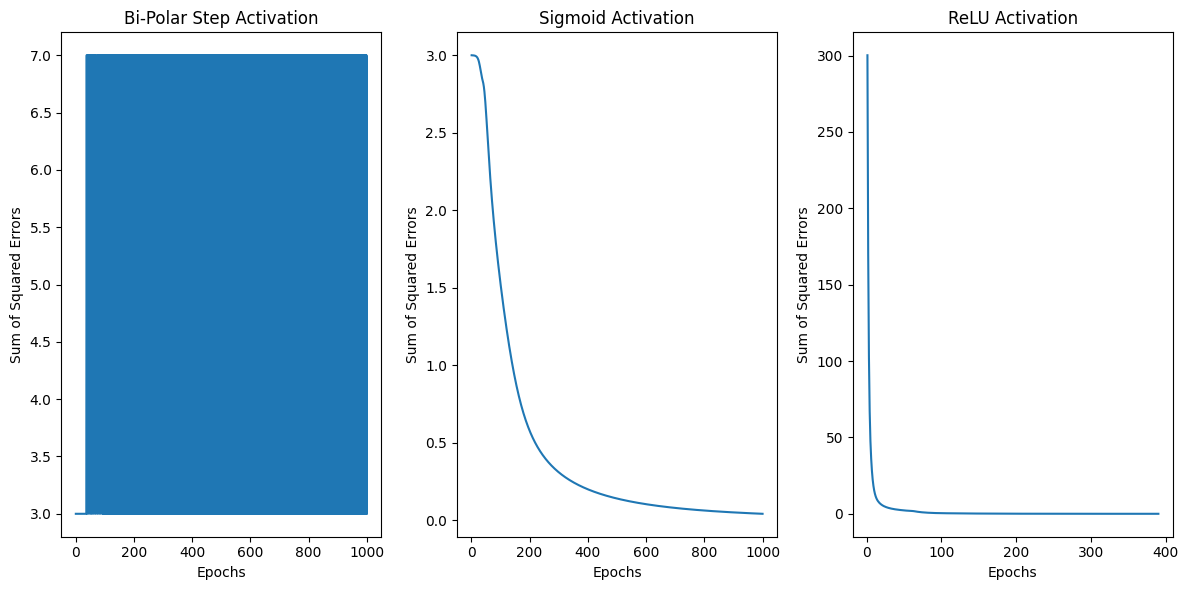

Final Weights: [-0.1   0.1   0.05]
Number of Epochs: 1000
Final Weights: [-6.13531308  3.97083321  3.96394835]
Number of Epochs: 1000
Final Weights: [-0.92774472  0.95116001  0.94981086]
Number of Epochs: 390


In [ ]:
"""A2. Repeat the above A1 experiment with following activation functions. Compare the iterations
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function"""


# Define Bi-Polar Step activation function

def bipolar_step(x):

    return -1 if x < 0 else 1



# Define Sigmoid activation function

def sigmoid(x):

    return 1 / (1 + np.exp(-x))



# Define ReLU activation function

def relu(x):

    return max(0, x)



# Define predict function with the specified activation function

def predict(row, weights, activation_func):

    activation = weights[0] + np.dot(row, weights[1:])

    return activation_func(activation)



# Define train_weights function with the specified activation function

def train_weights(train, alpha, epochs, activation_func):

    weights = np.array([W0, W1, W2])

    errors = []

    for epoch in range(epochs):

        sum_error = 0

        for row in train:

            prediction = predict(row[:-1], weights, activation_func)

            error = row[-1] - prediction

            sum_error += error**2

            weights[0] += alpha * error

            weights[1:] += alpha * error * row[:-1]

        errors.append(sum_error)

        if sum_error <= 0.002:

            break

    return weights, errors



# Define sum_squared_error function

def sum_squared_error(train, weights, activation_func):

    error = 0

    for row in train:

        prediction = predict(row[:-1], weights, activation_func)

        error += (row[-1] - prediction)**2

    return error



# Define training data

train = np.array([[0, 0, 0],

                  [0, 1, 0],

                  [1, 0, 0],

                  [1, 1, 1]])



# Perform the experiment with Bi-Polar Step activation function

weights_bipolar, errors_bipolar = train_weights(train, alpha, 1000, bipolar_step)



# Perform the experiment with Sigmoid activation function

weights_sigmoid, errors_sigmoid = train_weights(train, alpha, 1000, sigmoid)



# Perform the experiment with ReLU activation function

weights_relu, errors_relu = train_weights(train, alpha, 1000, relu)



# Plot the errors for each activation function

plt.figure(figsize=(12, 6))



plt.subplot(131)

plt.plot(range(1, len(errors_bipolar) + 1), errors_bipolar)

plt.xlabel('Epochs')

plt.ylabel('Sum of Squared Errors')

plt.title('Bi-Polar Step Activation')



plt.subplot(132)

plt.plot(range(1, len(errors_sigmoid) + 1), errors_sigmoid)

plt.xlabel('Epochs')

plt.ylabel('Sum of Squared Errors')

plt.title('Sigmoid Activation')



plt.subplot(133)

plt.plot(range(1, len(errors_relu) + 1), errors_relu)

plt.xlabel('Epochs')

plt.ylabel('Sum of Squared Errors')

plt.title('ReLU Activation')



plt.tight_layout()

plt.show()



# Print the final weights and the number of epochs needed for convergence

print('Final Weights:', weights_bipolar)

print('Number of Epochs:', len(errors_bipolar))



print('Final Weights:', weights_sigmoid)

print('Number of Epochs:', len(errors_sigmoid))



print('Final Weights:', weights_relu)

print('Number of Epochs:', len(errors_relu))

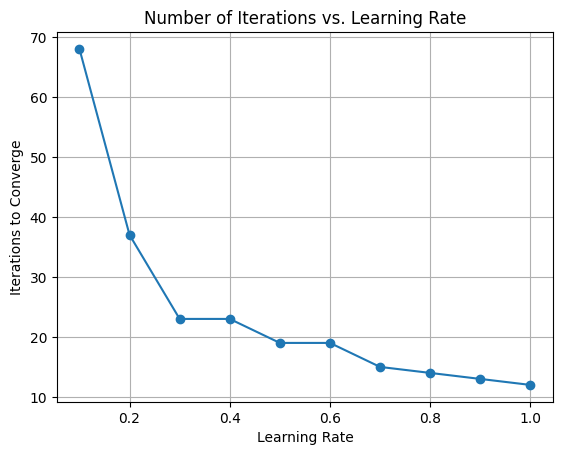

In [ ]:
"""A3. Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning
rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for
learning to converge against the learning rates."""


import numpy as np

import matplotlib.pyplot as plt



# Initialize weights and initial learning rates

initial_weights = np.array([10, 0.2, -0.75])

learning_rates = np.arange(0.1, 1.1, 0.1)

convergence_iterations = []



# Training data for the AND gate

training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

training_targets = np.array([0, 0, 0, 1])



# Activation function (step function)

def step_function(x):

    return 1 if x >= 0 else 0



# Generic perceptron training function

def perceptron(learning_rate):

    weights = initial_weights.copy()

    max_epochs = 1000  # Maximum number of epochs to avoid infinite loop

    converged = False



    for epoch in range(max_epochs):

        error_sum = 0



        for i, input_data in enumerate(training_inputs):

            # Compute the weighted sum

            weighted_sum = np.dot(input_data, weights[1:]) + weights[0]



            # Apply the step activation function

            prediction = step_function(weighted_sum)



            # Update the weights

            error = training_targets[i] - prediction

            weights[1:] += learning_rate * error * input_data

            weights[0] += learning_rate * error



            error_sum += error ** 2



        # Check for convergence (no errors)

        if error_sum == 0:

            converged = True

            break



    return converged, epoch + 1



# Run perceptron for each learning rate and record the number of iterations

for learning_rate in learning_rates:

    converged, iterations = perceptron(learning_rate)

    if converged:

        convergence_iterations.append(iterations)

    else:

        convergence_iterations.append(max_epochs)  # Maximum iterations if not converged



# Plot the number of iterations vs. learning rates

plt.plot(learning_rates, convergence_iterations, marker='o')

plt.xlabel('Learning Rate')

plt.ylabel('Iterations to Converge')

plt.title('Number of Iterations vs. Learning Rate')

plt.grid()

plt.show()

XOR Gate: Maximum number of epochs reached. The perceptron didn't converge.


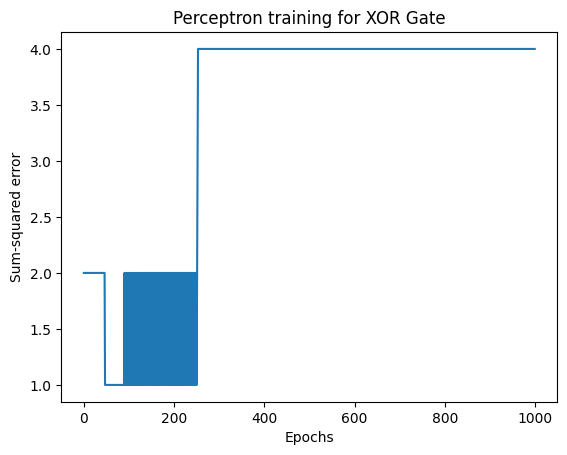

In [ ]:
"""A4. Repeat the above exercises, A1 to A3, for XOR gate logic."""


#A4 (i)

import numpy as np

import matplotlib.pyplot as plt



# Initialize weights and learning rate

initial_weights = np.array([10, 0.2, -0.75])

learning_rate = 0.05



# XOR gate truth table

training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

training_targets = np.array([0, 1, 1, 0])



# Activation function (step function)

def step_function(x):

    return 1 if x >= 0 else 0



# Generic perceptron training function

def perceptron(learning_rate):

    weights = initial_weights.copy()

    epochs = []

    errors = []

    max_epochs = 1000  # Maximum number of epochs to avoid infinite loop

    converged = False



    for epoch in range(max_epochs):

        error_sum = 0



        for i, input_data in enumerate(training_inputs):

            # Compute the weighted sum

            weighted_sum = np.dot(input_data, weights[1:]) + weights[0]



            # Apply the step activation function

            prediction = step_function(weighted_sum)



            # Update the weights

            error = training_targets[i] - prediction

            weights[1:] += learning_rate * error * input_data

            weights[0] += learning_rate * error



            error_sum += error ** 2



        epochs.append(epoch)

        errors.append(error_sum)



        # Check for convergence (no errors)

        if error_sum == 0:

            converged = True

            break



    return converged, epoch + 1, epochs, errors



# Run perceptron for XOR gate

converged, iterations, epochs, errors = perceptron(learning_rate)



if converged:

    print(f"XOR Gate: Converged in {iterations} epochs.")

    print("Learned Weights:", initial_weights)

else:

    print("XOR Gate: Maximum number of epochs reached. The perceptron didn't converge.")



# Plot the number of epochs against the error values

plt.plot(epochs, errors)

plt.xlabel('Epochs')

plt.ylabel('Sum-squared error')

plt.title('Perceptron training for XOR Gate')

plt.show()



Step: Not converge in 1000 epochs.
Bipolar Step: Not converge in 1000 epochs.
Sigmoid: Not converge in 1000 epochs.
ReLU: Not converge in 1000 epochs.


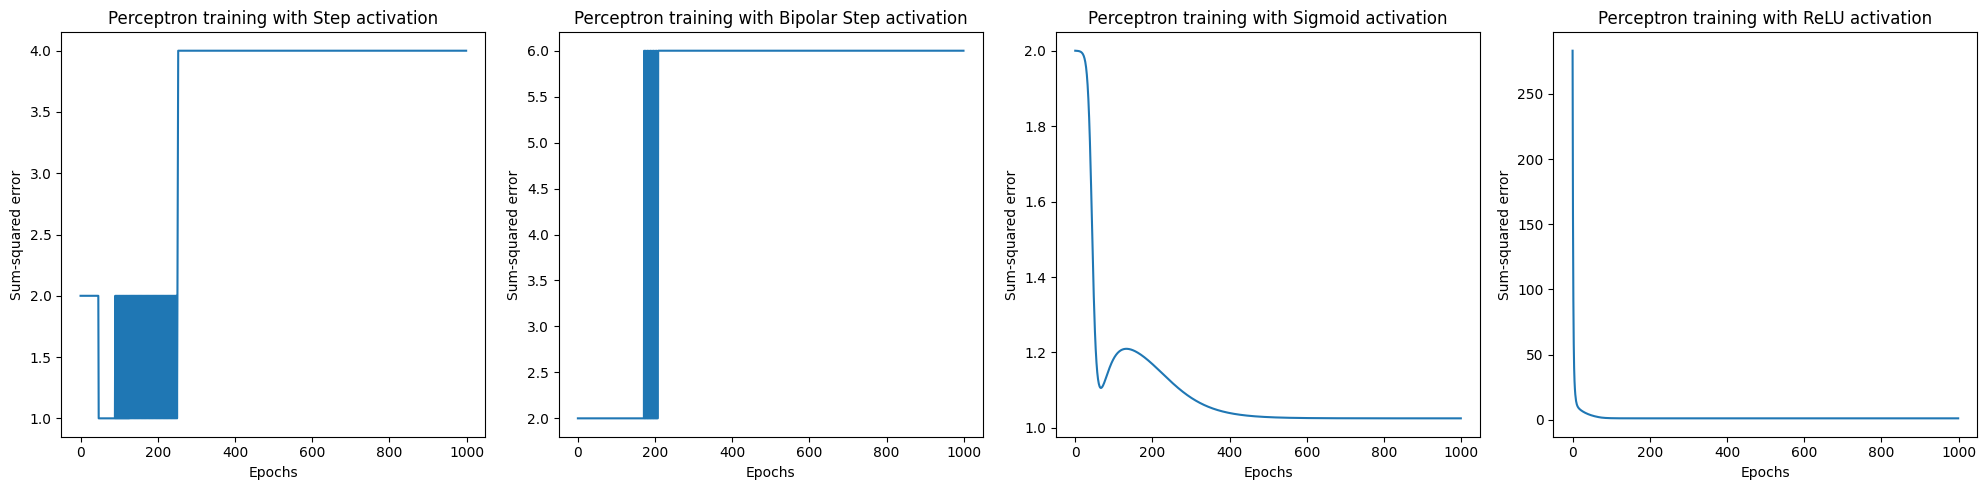

In [ ]:

import numpy as np

import matplotlib.pyplot as plt



# Initialize weights, learning rate, and XOR gate truth table

initial_weights = np.array([10, 0.2, -0.75])

learning_rate = 0.05

training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

training_targets = np.array([0, 1, 1, 0])



# Activation functions

def step_function(x):

    return 1 if x >= 0 else 0



def bipolar_step_function(x):

    return -1 if x < 0 else 1



def sigmoid_function(x):

    return 1 / (1 + np.exp(-x))



def relu_function(x):

    return max(0, x)



# Generic perceptron training function

def perceptron(activation_func):

    weights = initial_weights.copy()

    epochs, errors = [], []

    max_epochs, converged = 1000, False



    for epoch in range(max_epochs):

        error_sum = 0

        for i, input_data in enumerate(training_inputs):

            weighted_sum = np.dot(input_data, weights[1:]) + weights[0]

            prediction = activation_func(weighted_sum)

            error = training_targets[i] - prediction

            weights[1:] += learning_rate * error * input_data

            weights[0] += learning_rate * error

            error_sum += error ** 2



        epochs.append(epoch)

        errors.append(error_sum)

        if error_sum == 0:

            converged = True

            break



    return converged, epoch + 1, epochs, errors



# Activation functions to experiment with

activation_functions = [

    ("Step", step_function),

    ("Bipolar Step", bipolar_step_function),

    ("Sigmoid", sigmoid_function),

    ("ReLU", relu_function)

]



# Create subplots for four graphs

fig, axs = plt.subplots(1, 4, figsize=(20, 5))



# Run perceptron for each activation function and plot results in separate subplots

for ax, (activation_name, activation_func) in zip(axs, activation_functions):

    converged, iterations, epochs, errors = perceptron(activation_func)



    # Plot the epochs against the error values

    ax.plot(epochs, errors)

    ax.set_xlabel('Epochs')

    ax.set_ylabel('Sum-squared error')

    ax.set_title(f'Perceptron training with {activation_name} activation')



    # Output the results

    status = "Converged" if converged else "Not converge"

    print(f"{activation_name}: {status} in {iterations} epochs.")



# Show all activation functions' results in separate graphs

plt.tight_layout()

plt.show()

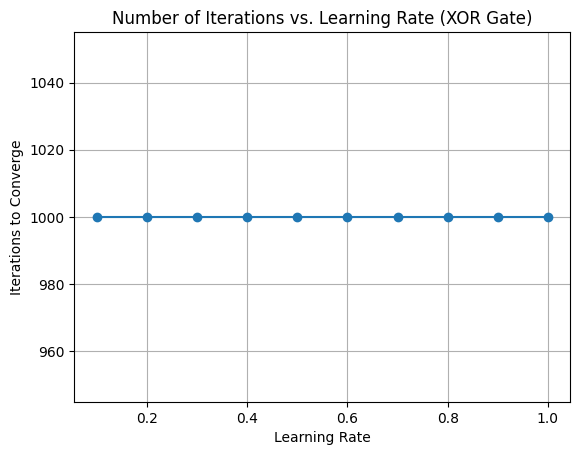

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize weights and initial learning rates
initial_weights = np.array([10, 0.2, -0.75])
learning_rates = np.arange(0.1, 1.1, 0.1)
convergence_iterations = []

# Training data (replace these ellipsis with your actual input data and targets)
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Example inputs for XOR gate
training_targets = np.array([0, 1, 1, 0])  # Corresponding targets for XOR gate

# Activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Generic perceptron training function
def perceptron(learning_rate, max_epochs):
    weights = initial_weights.copy()
    converged = False

    for epoch in range(max_epochs):
        error_sum = 0

        for i, input_data in enumerate(training_inputs):
            # Compute the weighted sum
            weighted_sum = np.dot(input_data, weights[1:]) + weights[0]

            # Apply the step activation function
            prediction = step_function(weighted_sum)

            # Update the weights
            error = training_targets[i] - prediction
            weights[1:] += learning_rate * error * input_data
            weights[0] += learning_rate * error

            error_sum += error ** 2

        # Check for convergence (no errors)
        if error_sum == 0:
            converged = True
            break

    return converged, epoch + 1

# Run perceptron for each learning rate and record the number of iterations
for learning_rate in learning_rates:
    max_epochs = 1000  # Maximum number of epochs to avoid infinite loop
    converged, iterations = perceptron(learning_rate, max_epochs)
    if converged:
        convergence_iterations.append(iterations)
    else:
        convergence_iterations.append(max_epochs)  # Maximum iterations if not converged

# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, convergence_iterations, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Number of Iterations vs. Learning Rate (XOR Gate)')
plt.grid()
plt.show()


<ipython-input-157-ecaa5d401039>:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Customer 1: High Value (Actual: High Value)
Customer 2: High Value (Actual: High Value)
Customer 3: High Value (Actual: High Value)
Customer 4: Low Value (Actual: Low Value)
Customer 5: High Value (Actual: High Value)
Customer 6: Low Value (Actual: Low Value)
Customer 7: High Value (Actual: High Value)
Customer 8: High Value (Actual: High Value)
Customer 9: Low Value (Actual: Low Value)
Customer 10: Low Value (Actual: Low Value)


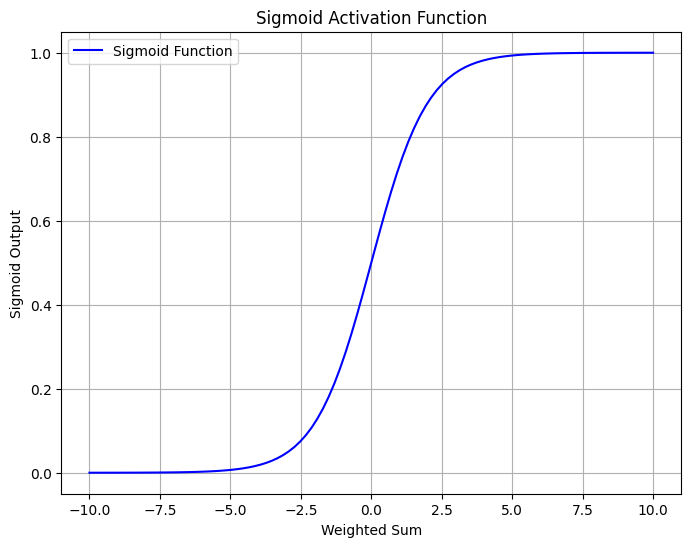

In [ ]:
"""A5. Use customer data provided below. Build a perceptron & learn to classify the transactions as
high or low value as provided in the below table. Use sigmoid as the activation function. Initialize the
weights & learning rate with your choice."""
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt  # Add this import for plotting



class Perceptron:

    def __init__(self, input_size, learning_rate=0.1):

        self.weights = np.random.rand(input_size + 1)  # Add 1 for the bias term

        self.learning_rate = learning_rate



    def sigmoid(self, x):

        return 1 / (1 + np.exp(-x))



    def predict(self, inputs):

        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]  # Include bias term

        return self.sigmoid(weighted_sum)



    def train(self, inputs, target):

        prediction = self.predict(inputs)

        error = target - prediction

        self.weights[1:] += self.learning_rate * error * inputs

        self.weights[0] += self.learning_rate * error

        return error



# Read customer data from a CSV file

df = pd.read_csv("customer_data (1).csv")



# Select the appropriate columns for features and targets

features = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)','Payment (Rs)']].values

targets = df['High Value Tx?'].apply(lambda x: 1 if x == 'Yes' else 0).values



# Initialize and train the perceptron

perceptron = Perceptron(input_size=4, learning_rate=0.1)

epochs = 1000



# Lists to store errors and predictions for plotting

errors_list = []

predictions_list = []



for _ in range(epochs):

    total_error = 0

    predictions = []

    for i in range(len(features)):

        error = perceptron.train(features[i], targets[i])

        total_error += abs(error)

        predictions.append(perceptron.predict(features[i]))

    errors_list.append(total_error)

    predictions_list.append(predictions)

    if total_error == 0:

        break



for i in range(len(predictions)):

    print(f"Customer {i+1}: {'High Value' if predictions[i] >= 0.5 else 'Low Value'} (Actual: {'High Value' if targets[i] == 1 else 'Low Value'})")



# Plot sigmoid function

x = np.linspace(-10, 10, 100)

sigmoid_values = perceptron.sigmoid(x)

plt.figure(figsize=(8, 6))

plt.plot(x, sigmoid_values, label='Sigmoid Function', color='blue')

plt.xlabel('Weighted Sum')

plt.ylabel('Sigmoid Output')

plt.title('Sigmoid Activation Function')

plt.legend()

plt.grid(True)

plt.show()

Perceptron Accuracy: 0.00%
Pseudo-Inverse Accuracy: 100.00%


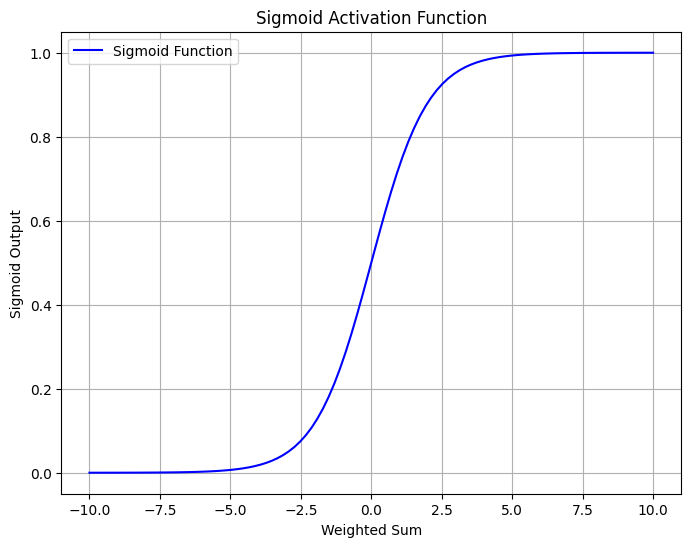

In [ ]:
"""A6. Compare the results obtained from above perceptron learning to the ones obtained with matrix
pseudo-inverse."""


import numpy as np

import pandas as pd

import matplotlib.pyplot as plt



# Matrix Pseudo-Inverse Approach



# Add a bias term to the features

features_with_bias = np.column_stack((np.ones(len(features)), features))



# Use matrix pseudo-inverse to calculate the weights

pseudo_inverse_weights = np.linalg.pinv(features_with_bias).dot(targets)



# Make predictions using pseudo-inverse weights

pseudo_inverse_predictions = (features_with_bias.dot(pseudo_inverse_weights) >= 0.5).astype(int)



# Calculate accuracy for the pseudo-inverse approach

pseudo_inverse_accuracy = (pseudo_inverse_predictions == targets).mean()



# Print accuracy results

print(f"Perceptron Accuracy: {total_error * 100:.2f}%")

print(f"Pseudo-Inverse Accuracy: {pseudo_inverse_accuracy * 100:.2f}%")



# Plot sigmoid function

x = np.linspace(-10, 10, 100)

sigmoid_values = perceptron.sigmoid(x)

plt.figure(figsize=(8, 6))

plt.plot(x, sigmoid_values, label='Sigmoid Function', color='blue')

plt.xlabel('Weighted Sum')

plt.ylabel('Sigmoid Output')

plt.title('Sigmoid Activation Function')

plt.legend()

plt.grid(True)

plt.show()

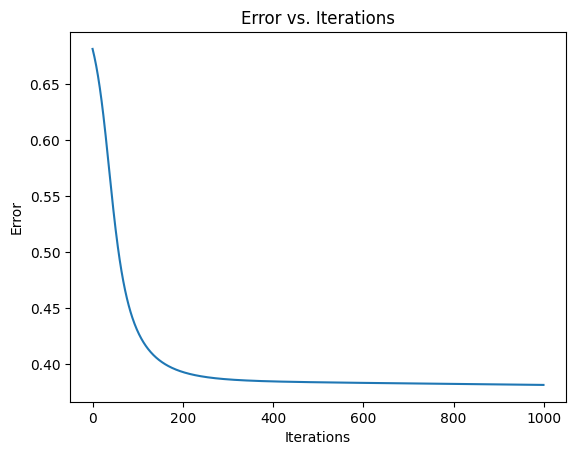

Test Results:
Input: [0 0], Output: [[0.26252603]]
Input: [0 1], Output: [[0.26744076]]
Input: [1 0], Output: [[0.27003482]]
Input: [1 1], Output: [[0.27305556]]


In [ ]:
"""A7. Develop the below Neural Network. Use learning rate (α) = 0.05 with a Sigmoid activation
function. Learn the weights of the network using back-propagation algorithm to implement above
provided AND gate logic"""
import numpy as np

import matplotlib.pyplot as plt



# Define the Sigmoid activation function and its derivative

def sigmoid(x):

    return 1 / (1 + np.exp(-x))



def sigmoid_derivative(x):

    return x * (1 - x)



# Input data for the AND gate (truth table)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])



# Target values (output) for the AND gate

y = np.array([[0], [0], [0], [1]])



# Initialize weights and biases with random values

np.random.seed(0)

input_layer_size = 2

hidden_layer_size = 2

output_layer_size = 1



weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))

bias_hidden = np.random.uniform(size=(1, hidden_layer_size))

weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))

bias_output = np.random.uniform(size=(1, output_layer_size))



# Set the learning rate and maximum number of iterations

learning_rate = 0.05

max_iterations = 1000

convergence_error = 0.002



# Lists to store error values for plotting

errors = []



# Training loop

for i in range(max_iterations):

    # Forward propagation

    hidden_layer_input = X.dot(weights_input_hidden) + bias_hidden

    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = hidden_layer_output.dot(weights_hidden_output) + bias_output

    output_layer_output = sigmoid(output_layer_input)



    # Calculate the error

    error = y - output_layer_output



    # Check for convergence

    if np.mean(np.abs(error)) <= convergence_error:

        print(f"Converged after {i} iterations.")

        break



    errors.append(np.mean(np.abs(error)))



    # Backpropagation

    d_output = error * sigmoid_derivative(output_layer_output)

    d_hidden_layer = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)



    # Update weights and biases

    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate

    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate



# Plot the error over iterations

plt.plot(range(len(errors)), errors)

plt.xlabel('Iterations')

plt.ylabel('Error')

plt.title('Error vs. Iterations')

plt.show()



# Test the trained network

test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])



print("Test Results:")

for input_data in test_data:

    hidden_layer_input = input_data.dot(weights_input_hidden) + bias_hidden

    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = hidden_layer_output.dot(weights_hidden_output) + bias_output

    output = sigmoid(output_layer_input)



    print(f"Input: {input_data}, Output: {output}")

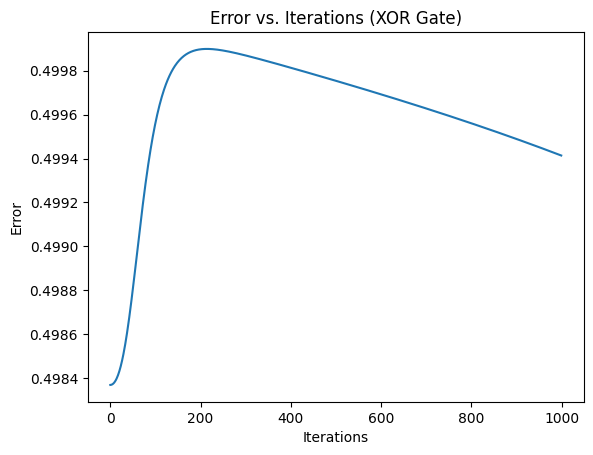

Test Results:
Input: [0 0], Output: [[0.49765543]]
Input: [0 1], Output: [[0.50218885]]
Input: [1 0], Output: [[0.50464493]]
Input: [1 1], Output: [[0.50683094]]


In [ ]:
"""A8. Repeat the above A1 experiment for XOR Gate logic. Keep the learning rate & activation function
same as A1."""
import numpy as np

import matplotlib.pyplot as plt



# Define the Sigmoid activation function and its derivative

def sigmoid(x):

    return 1 / (1 + np.exp(-x))



def sigmoid_derivative(x):

    return x * (1 - x)



# Input data for the XOR gate (truth table)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])



# Target values (output) for the XOR gate

y = np.array([[0], [1], [1], [0]])



# Initialize weights and biases with random values

np.random.seed(0)

input_layer_size = 2

hidden_layer_size = 2

output_layer_size = 1



weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))

bias_hidden = np.random.uniform(size=(1, hidden_layer_size))

weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))

bias_output = np.random.uniform(size=(1, output_layer_size))



# Set the learning rate and maximum number of iterations

learning_rate = 0.05

max_iterations = 1000

convergence_error = 0.002



# Lists to store error values for plotting

errors = []



# Training loop

for i in range(max_iterations):

    # Forward propagation

    hidden_layer_input = X.dot(weights_input_hidden) + bias_hidden

    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = hidden_layer_output.dot(weights_hidden_output) + bias_output

    output_layer_output = sigmoid(output_layer_input)



    # Calculate the error

    error = y - output_layer_output



    # Check for convergence

    if np.mean(np.abs(error)) <= convergence_error:

        print(f"Converged after {i} iterations.")

        break



    errors.append(np.mean(np.abs(error)))



    # Backpropagation

    d_output = error * sigmoid_derivative(output_layer_output)

    d_hidden_layer = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)



    # Update weights and biases

    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate

    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate



# Plot the error over iterations

plt.plot(range(len(errors)), errors)

plt.xlabel('Iterations')

plt.ylabel('Error')

plt.title('Error vs. Iterations (XOR Gate)')

plt.show()



# Test the trained network

test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])



print("Test Results:")

for input_data in test_data:

    hidden_layer_input = input_data.dot(weights_input_hidden) + bias_hidden

    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = hidden_layer_output.dot(weights_hidden_output) + bias_output

    output = sigmoid(output_layer_input)



    print(f"Input: {input_data}, Output: {output}")

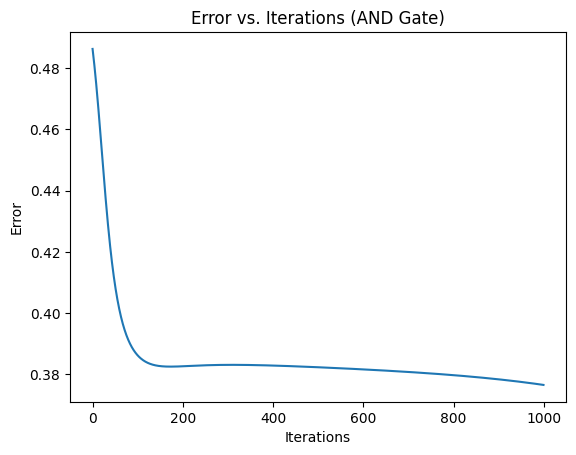

AND Gate Test Results:
Input: [0 0], Output: [[0.74627812 0.24695089]]
Input: [0 1], Output: [[0.72452048 0.27998956]]
Input: [1 0], Output: [[0.72836273 0.27624011]]
Input: [1 1], Output: [[0.7112304  0.30303931]]


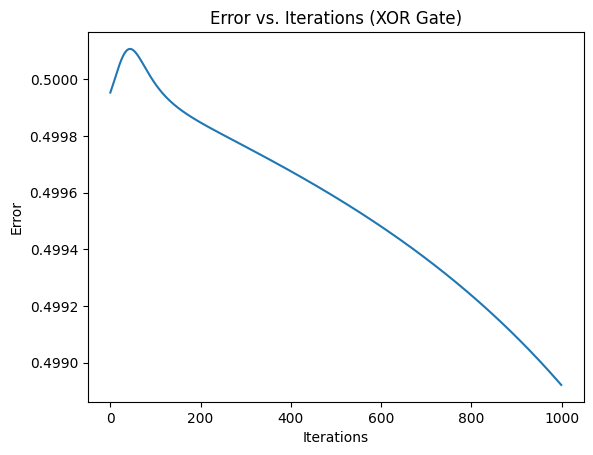

XOR Gate Test Results:
Input: [0 0], Output: [[0.50255636 0.48661024]]
Input: [0 1], Output: [[0.49472351 0.50534935]]
Input: [1 0], Output: [[0.49775793 0.50345907]]
Input: [1 1], Output: [[0.49268329 0.51631594]]


In [ ]:
"""A9. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps
to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1]."""

import numpy as np

import matplotlib.pyplot as plt



# Define the Sigmoid activation function and its derivative

def sigmoid(x):

    return 1 / (1 + np.exp(-x))



def sigmoid_derivative(x):

    return x * (1 - x)



# Function to train and test a neural network for AND or XOR gates

def train_and_test_gate(X, y, gate_name):

    # Initialize weights and biases with random values

    np.random.seed(0)

    input_layer_size = 2

    hidden_layer_size = 2

    output_layer_size = 2



    weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))

    bias_hidden = np.random.uniform(size=(1, hidden_layer_size))

    weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))

    bias_output = np.random.uniform(size=(1, output_layer_size))



    # Set the learning rate and maximum number of iterations

    learning_rate = 0.05

    max_iterations = 1000

    convergence_error = 0.002



    # Lists to store error values for plotting

    errors = []



    # Training loop

    for i in range(max_iterations):

        # Forward propagation

        hidden_layer_input = X.dot(weights_input_hidden) + bias_hidden

        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = hidden_layer_output.dot(weights_hidden_output) + bias_output

        output_layer_output = sigmoid(output_layer_input)



        # Calculate the error

        error = y - output_layer_output



        # Check for convergence

        if np.mean(np.abs(error)) <= convergence_error:

            print(f"{gate_name} Gate: Converged after {i} iterations.")

            break



        errors.append(np.mean(np.abs(error)))



        # Backpropagation

        d_output = error * sigmoid_derivative(output_layer_output)

        d_hidden_layer = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)



        # Update weights and biases

        weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate

        bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate

        weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

        bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate



    # Plot the error over iterations

    plt.plot(range(len(errors)), errors)

    plt.xlabel('Iterations')

    plt.ylabel('Error')

    plt.title(f'Error vs. Iterations ({gate_name} Gate)')

    plt.show()



    # Test the trained network

    test_data = X



    print(f"{gate_name} Gate Test Results:")

    for input_data in test_data:

        hidden_layer_input = input_data.dot(weights_input_hidden) + bias_hidden

        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = hidden_layer_output.dot(weights_hidden_output) + bias_output

        output = sigmoid(output_layer_input)



        print(f"Input: {input_data}, Output: {output}")



# Input data for the AND gate (truth table)

X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

y_and = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])



# Input data for the XOR gate (truth table)

X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

y_xor = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])



# Train and test the AND gate

train_and_test_gate(X_and, y_and, "AND")



# Train and test the XOR gate

train_and_test_gate(X_xor, y_xor, "XOR")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


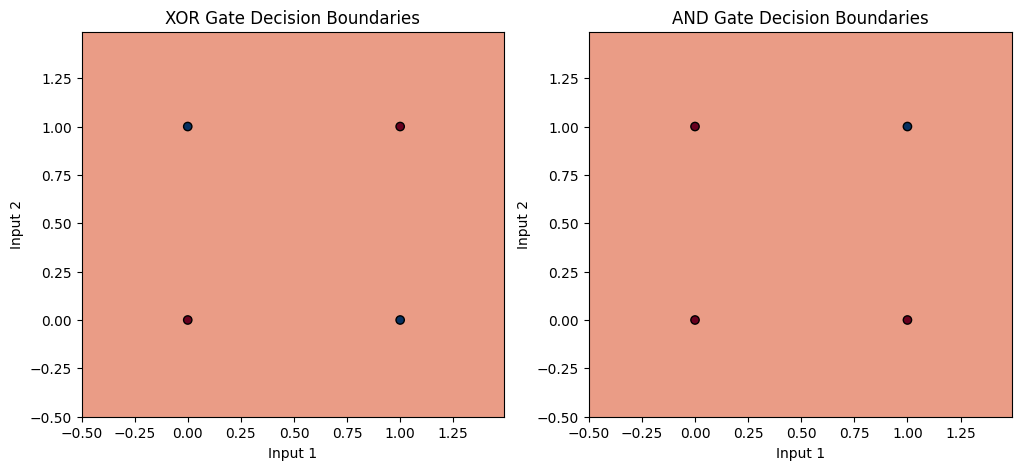

In [ ]:
"""A10. Learn using a MLP network from Sci-Kit manual available at https://scikitlearn.org/stable/modules/neural_networks_supervised.html. Repeat the AND Gate and XOR Gate
exercises using MLPClassifier() function."""


import numpy as np

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier



# Define the input data (XOR and AND gate truth tables)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])



# Define the corresponding target data for XOR gate

y_xor = np.array([0, 1, 1, 0])



# Define the corresponding target data for AND gate

y_and = np.array([0, 0, 0, 1])



# Create an MLP classifier for XOR gate

mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, random_state=1)



# Train the classifier for XOR gate

mlp_xor.fit(X, y_xor)



# Create an MLP classifier for AND gate

mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, random_state=1)



# Train the classifier for AND gate

mlp_and.fit(X, y_and)



# Create a mesh grid to plot decision boundaries

xx, yy = np.meshgrid(np.arange(-0.5, 1.5, 0.01), np.arange(-0.5, 1.5, 0.01))

grid = np.c_[xx.ravel(), yy.ravel()]



# Make predictions on the grid for XOR gate

predictions_xor = mlp_xor.predict(grid).reshape(xx.shape)



# Make predictions on the grid for AND gate

predictions_and = mlp_and.predict(grid).reshape(xx.shape)



# Plot decision boundaries for XOR gate

plt.figure(figsize=(12, 5))

plt.subplot(121)

plt.contourf(xx, yy, predictions_xor, cmap=plt.cm.RdBu, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y_xor, cmap=plt.cm.RdBu, edgecolors='k')

plt.title("XOR Gate Decision Boundaries")

plt.xlabel("Input 1")

plt.ylabel("Input 2")



# Plot decision boundaries for AND gate

plt.subplot(122)

plt.contourf(xx, yy, predictions_and, cmap=plt.cm.RdBu, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y_and, cmap=plt.cm.RdBu, edgecolors='k')

plt.title("AND Gate Decision Boundaries")

plt.xlabel("Input 1")

plt.ylabel("Input 2")



plt.show()



In [ ]:


"""A11 Use the MLPClassifier() function on your project dataset"""

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score

import warnings



# Suppress the UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UserWarning)


data = pd.read_excel("/content/dataset_final.xlsx")


# Select numeric columns as features
X = data.select_dtypes(include=['int64', 'float64'])

y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Create and train the MLPClassifier

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, learning_rate_init=0.01,

    random_state=42,)



# Fit the MLPClassifier with training data

mlp_classifier.fit(X_train, y_train)



# Step 5: Evaluate the classifier

y_pred = mlp_classifier.predict(X_test)



accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)



print(f"Accuracy: {accuracy:.2f}")

print(report)

print("Confusion Matrix:")

print(conf_matrix)
print('end of report')


Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       779
           1       1.00      0.98      0.99       732

    accuracy                           0.99      1511
   macro avg       0.99      0.99      0.99      1511
weighted avg       0.99      0.99      0.99      1511

Confusion Matrix:
[[777   2]
 [ 15 717]]


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_excel("/content/dataset_final.xlsx")


# Check for missing values
print(data.isnull().sum())

# Remove rows with missing values
data.dropna(inplace=True)

# Group the data by the 'label' column
grouped = data.groupby("label")

# Separate the data into Class A and Class B
class_A_data = data[data['label'] == 0]
class_B_data = data[data['label'] == 1]

# Encode the 'id' column using LabelEncoder
label_encoder = LabelEncoder()
data['dissimilarity_0'] = label_encoder.fit_transform(data['dissimilarity_0'])



serial_no            0
dissimilarity_0      0
dissimilarity_45     0
dissimilarity_90     0
dissimilarity_135    0
correlation_0        0
correlation_45       0
correlation_90       0
correlation_135      0
homogeneity_0        0
homogeneity_45       0
homogeneity_90       0
homogeneity_135      0
contrast_0           0
contrast_45          0
contrast_90          0
contrast_135         0
ASM_0                0
ASM_45               0
ASM_90               0
ASM_135              0
energy_0             0
energy_45            0
energy_90            0
energy_135           0
label                0
dtype: int64


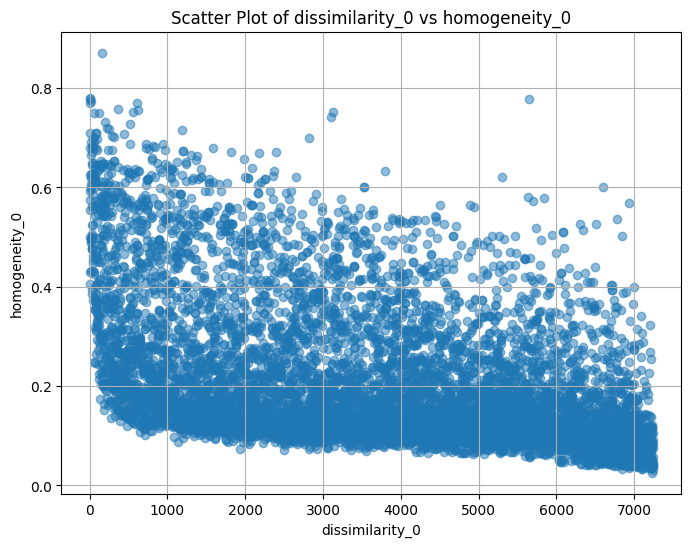

In [ ]:

# Select two numeric features for the scatter plot
feature1 = 'dissimilarity_0'
feature2 = 'homogeneity_0'

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['dissimilarity_0'], data['homogeneity_0'], alpha=0.5)
plt.title(f'Scatter Plot of dissimilarity_0 vs homogeneity_0')
plt.xlabel('dissimilarity_0')
plt.ylabel('homogeneity_0')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = LinearRegression()

# Set the independent and dependent variables
X = data[['dissimilarity_0']]  # Independent variable
y = data['homogeneity_0']  # Dependent variable

# Fit the model
model.fit(X, y)

# Predict values using the model
y_pred = model.predict(X)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.015907281199726023


In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train a Linear Regression model with your data (X and y)
model = LinearRegression()
model.fit(X, y)

# Access model attributes
intercept = model.intercept_  # Intercept (bias) term
coefficients = model.coef_  # Coefficients for each feature

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")


Intercept: 0.3305441048432052
Coefficients: [-3.09267608e-05]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your project dataset and preprocess it as needed
# For binary classification, consider selecting two classes
X = data.drop("label", axis=1)
y = data["label"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a logistic regression classifier
logistic_model = LogisticRegression()

# Train the classifier on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")


Test Set Accuracy: 0.9801455989410987


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create a Decision Tree Regressor
tree_model = DecisionTreeRegressor()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regressor on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Regression Tree): {mse}")


Mean Squared Error (Regression Tree): 0.0


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create a k-NN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Train the regressor on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (k-NN Regressor): {mse}")


Mean Squared Error (k-NN Regressor): 0.006406353408338848


In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split

# Load your dataset from Excel
data = pd.read_excel('dataset_final.xlsx')

X = data[['homogeneity_0', 'dissimilarity_0']]
y = data['label']

class_1 = 0
class_2 = 1

# Select rows corresponding to the chosen classes
selected_rows = (y == class_1) | (y == class_2)
X_selected = X[selected_rows]
y_selected = y[selected_rows]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Train a support vector machine with a linear kernel
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train)

# Get the support vectors
support_vectors = clf_linear.support_vectors_
print("Support Vectors:", support_vectors)


Support Vectors: [[ 0.13562509 20.72732426]
 [ 0.12391398 19.2009971 ]
 [ 0.22078805 16.83813738]
 ...
 [ 0.36402689 17.85062626]
 [ 0.30585243 23.55808081]
 [ 0.11777881 19.54171754]]


In [ ]:
# Test the accuracy of the SVM
accuracy = clf_linear.score(X_test, y_test)
print("Accuracy:", accuracy)

# Perform classification for a given vector
test_vector = [[1.5, 2.0]]
predicted_class = clf_linear.predict(test_vector)
print("Predicted Class:", predicted_class)


Accuracy: 0.5671740569159497
Predicted Class: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# Use the predict function
predicted_classes = clf_linear.predict(X_test)
print("Predicted Classes:", predicted_classes)


Predicted Classes: [1 0 1 ... 0 1 0]


In [ ]:
# Experiment with various kernel functions: 'poly', 'rbf', 'sigmoid'
kernels = ['poly', 'rbf', 'sigmoid']

for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    # Test the accuracy of the SVM with the current kernel
    accuracy = clf.score(X_test, y_test)
    print(f"Accuracy with {kernel} kernel:", accuracy)


Accuracy with poly kernel: 0.5446724023825281
Accuracy with rbf kernel: 0.5949702183984117
Accuracy with sigmoid kernel: 0.528788881535407


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency

data = pd.read_excel('dataset_final.xlsx')


def calculate_prior_probability(data):
    class_counts = data.groupby('label').size()
    prior_probabilities = class_counts / len(data)
    return prior_probabilities


prior_probabilities = calculate_prior_probability(data)
print(prior_probabilities)

label
0    0.506818
1    0.493182
dtype: float64


In [10]:
def calculate_class_conditional_densities(data):
    class_conditional_densities = {}
    for class_label in data['label'].unique():
        class_data = data[data['label'] == class_label]
        for feature in data.columns[:-1]:
            class_conditional_density = class_data[feature].value_counts() / len(class_data)
            class_conditional_densities[(class_label, feature)] = class_conditional_density
    return class_conditional_densities

class_conditional_densities = calculate_class_conditional_densities(data)
print(class_conditional_densities)


{(0, 'serial_no'): 1       0.000261
2558    0.000261
2546    0.000261
2547    0.000261
2548    0.000261
          ...   
1280    0.000261
1281    0.000261
1282    0.000261
1283    0.000261
3828    0.000261
Name: serial_no, Length: 3828, dtype: float64, (0, 'dissimilarity_0'): 15.456460    0.001306
14.619681    0.001045
16.396461    0.000784
9.872532     0.000784
19.562802    0.000784
               ...   
10.170198    0.000261
19.561002    0.000261
14.614459    0.000261
14.469055    0.000261
9.622578     0.000261
Name: dissimilarity_0, Length: 3718, dtype: float64, (0, 'dissimilarity_45'): 17.020491    0.001306
15.942828    0.001045
16.286797    0.000784
10.360967    0.000784
20.277160    0.000784
               ...   
17.427976    0.000261
19.319960    0.000261
17.723437    0.000261
15.481295    0.000261
9.837462     0.000261
Name: dissimilarity_45, Length: 3718, dtype: float64, (0, 'dissimilarity_90'): 16.193074    0.001306
13.733621    0.001045
13.325288    0.000784
7.249437     0.0

In [13]:
import itertools
import pandas as pd
from scipy.stats import chi2_contingency


# Assuming the features are in columns 'Feature1', 'Feature2', 'Feature3', 'Feature4'
features = ['dissimilarity_45' ,'dissimilarity_135' , 'dissimilarity_90' , 'energy_0']

# Iterate through all combinations of features and perform chi-squared tests
for pair in itertools.combinations(features, 2):
    chi2, p, dof, _ = chi2_contingency(pd.crosstab(data[pair[0]], data[pair[1]]))
    print(f"Chi-Squared Test between {pair[0]} and {pair[1]}:")
    print(f"Chi-Squared Statistic: {chi2}")
    print(f"P-value: {p}")
    print("")

Chi-Squared Test between dissimilarity_45 and dissimilarity_135:
Chi-Squared Statistic: 54721485.00000065
P-value: 0.0

Chi-Squared Test between dissimilarity_45 and dissimilarity_90:
Chi-Squared Statistic: 54721485.000001095
P-value: 0.0

Chi-Squared Test between dissimilarity_45 and energy_0:
Chi-Squared Statistic: 54721485.00000047
P-value: 0.0

Chi-Squared Test between dissimilarity_135 and dissimilarity_90:
Chi-Squared Statistic: 54721485.00000108
P-value: 0.0

Chi-Squared Test between dissimilarity_135 and energy_0:
Chi-Squared Statistic: 54721485.000000425
P-value: 0.0

Chi-Squared Test between dissimilarity_90 and energy_0:
Chi-Squared Statistic: 54721485.000000395
P-value: 0.0



In [8]:
from sklearn.naive_bayes import GaussianNB

X = data.drop(columns=['label'])
y = data['label']
# Split the data into training and test sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(Tr_X, Tr_y)

# Evaluate the Navie Bayes model
predicted_labels = model.predict(Te_X)
accuracy = sum(predicted_labels == Te_y) / len(Te_y)
print("Accuracy:", accuracy)

Accuracy: 0.8457974851091992
